# Machine Learning Homework 3

importing Libraries:

In [86]:
#ploting and Data presentation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from tqdm import tqdm
import seaborn as sns
from scipy.special import softmax

#SkLearn Librairies
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


# Introduction:

The goal is to build a predictive model that can classify employees into one of the following categories:

1.Active: Employees who are currently active and still employed.
2.Voluntarily Terminated: Employees who have voluntarily terminated their employment.
3. Terminated for Cause: Employees who have been terminated for cause.

The classification models aim to use various features or attributes of the employees (e.g., performance scores, demographics, satisfaction survey responses) to predict their employment status. The models learn patterns and relationships from the training data and then make predictions on unseen data.

first we will begin our journy with Data exploration and data preproccessing phases:


# Section A - Data exploration: 

In [2]:
# Load the CSV file
df = pd.read_csv('Human_Resuorces_Analytics.csv')

# Display the DataFrame
print("Data:")
print(df.head())

# Display metadata about the DataFrame
print("\nMetadata:")
print(df.info())
df

Data:
              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Al

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


# diversity profile
This pie chart and bar chart provide a visual representation of the distribution of employees across different racial groups, we can see that there are more whites then 

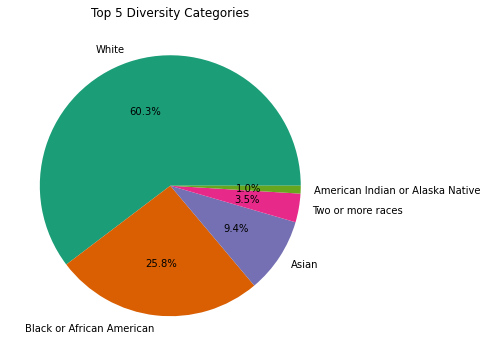

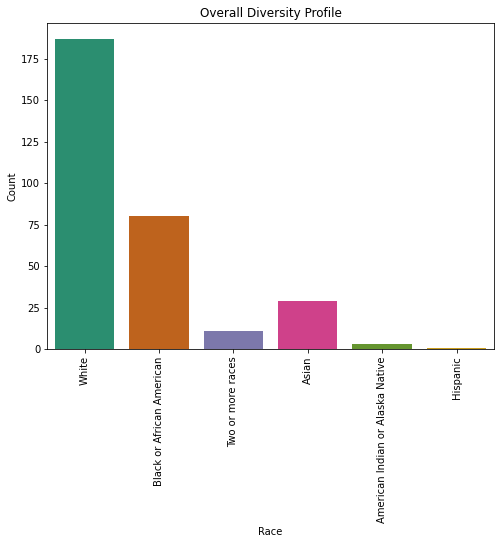

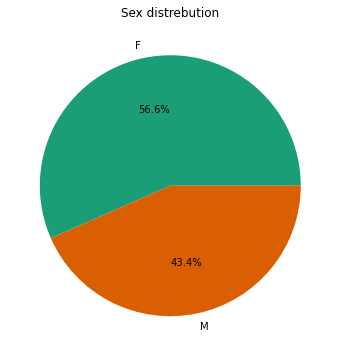

In [3]:

# Set the color palette
colors = sns.color_palette('Dark2')
# Top 5 diversity categories - Pie chart
top5_race = df['RaceDesc'].value_counts().nlargest(5)
plt.figure(figsize=(8, 6))
top5_race.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Top 5 Diversity Categories')
plt.ylabel('')
plt.show()
# Overall diversity profile - Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RaceDesc', palette=colors)
plt.title('Overall Diversity Profile')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Top 5 diversity categories - Pie chart
top5_race = df['Sex'].value_counts().nlargest(2)
plt.figure(figsize=(8, 6))
top5_race.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Sex distrebution')
plt.ylabel('')
plt.show()

# Relationship between performance score and who a person works for 


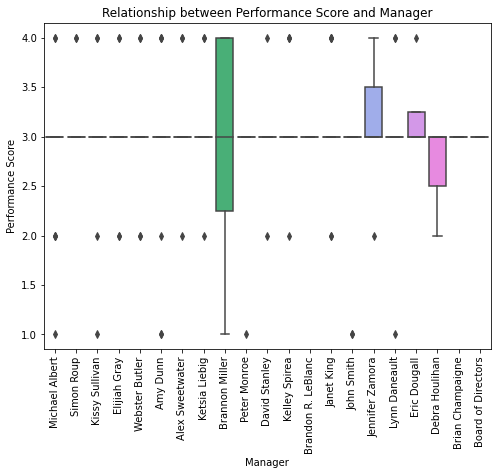

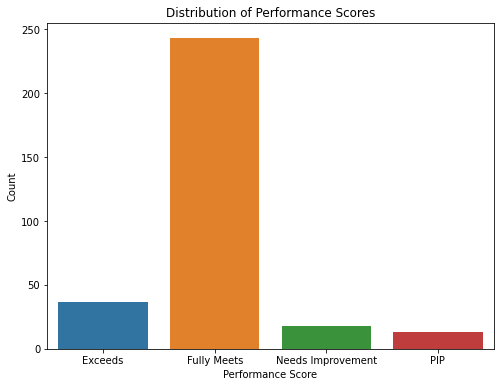

In [4]:

# Relationship between performance score and who a person works for
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='ManagerName', y='PerfScoreID')
plt.title('Relationship between Performance Score and Manager')
plt.xlabel('Manager')
plt.ylabel('Performance Score')
plt.xticks(rotation=90)
plt.show()

# Example: Distribution of performance scores
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PerformanceScore')
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()


# Areas of the company where pay is not equitable:


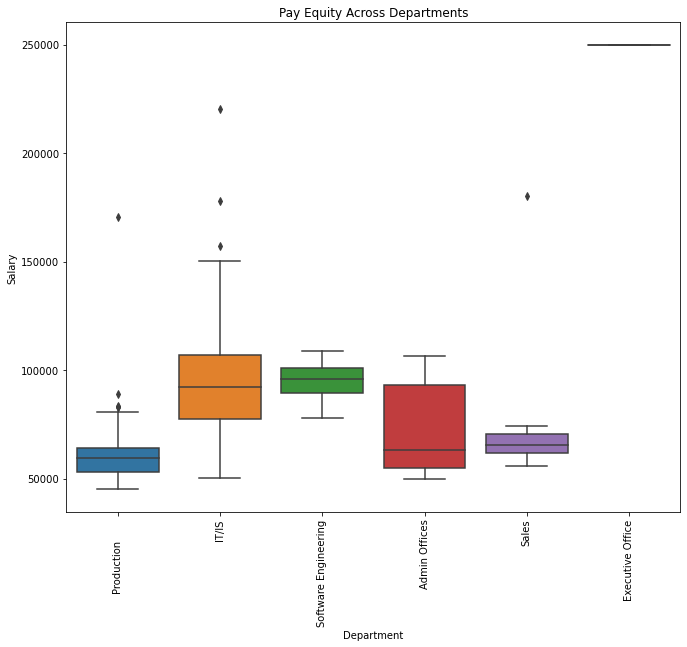

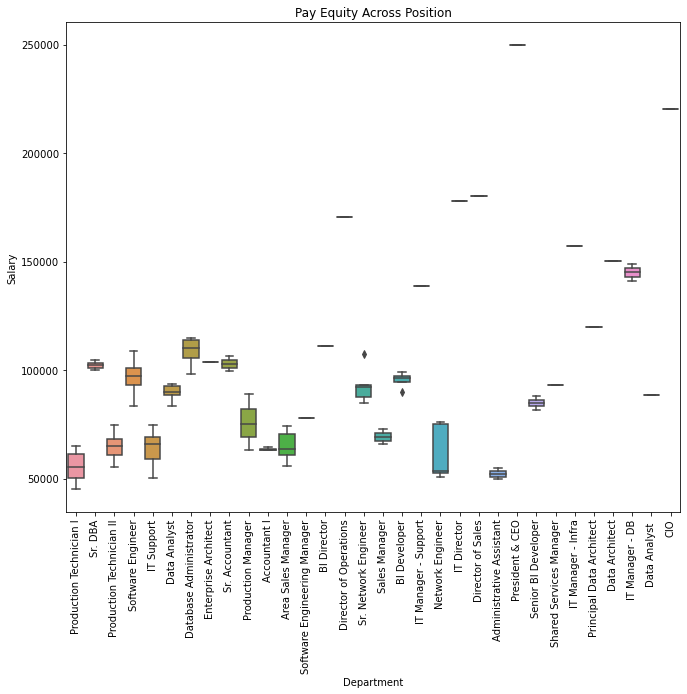

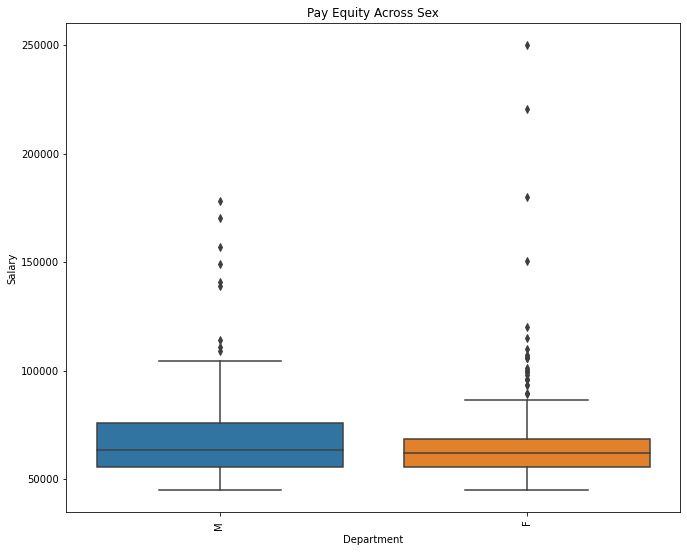

In [5]:

# Pay equity across departments
plt.figure(figsize=(11, 9))
sns.boxplot(data=df, x='Department', y='Salary')
plt.title('Pay Equity Across Departments')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


# Pay equity across Position
plt.figure(figsize=(11, 9))
sns.boxplot(data=df, x='Position', y='Salary')
plt.title('Pay Equity Across Position')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

# Pay equity across Sex
plt.figure(figsize=(11, 9))
sns.boxplot(data=df, x='Sex', y='Salary')
plt.title('Pay Equity Across Sex')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


# Additional visualization 1:

# Example: Employee satisfaction levels

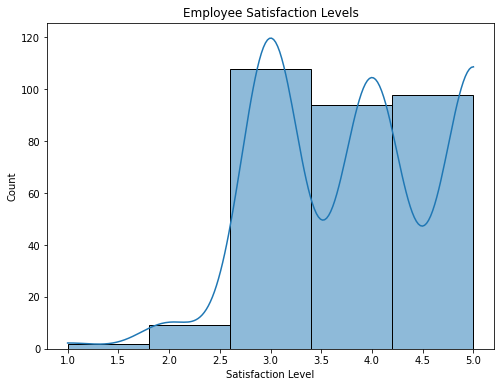

In [6]:
# Additional visualization 1
# Example: Employee satisfaction levels
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='EmpSatisfaction', bins=5, kde=True)
plt.title('Employee Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()



In [7]:
# Additional visualization 2


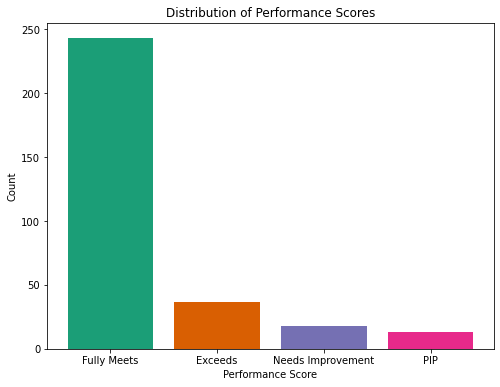

In [8]:
#Stacked bar plot for distribution of performance scores
colors = sns.color_palette('Dark2')
performance_counts = df['PerformanceScore'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(performance_counts.index, performance_counts.values, color=colors)
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()

# Section A - Data Pre-processing:
Pre-processing the data is an essential step to ensure that the data is in a suitable format and to address any issues that might affect the performance of the models.



In [9]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Human_Resuorces_Analytics.csv')

# Drop unnecessary columns
df = df.drop(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID',
              'PerfScoreID', 'FromDiversityJobFairID', 'PositionID', 'ManagerID'], axis=1)

# Preprocessing steps with progress bars
with tqdm(total=13, desc="Imputation") as pbar:
    # Fill missing values with -1
    df = df.fillna(-1)
    pbar.update(1)

    # Encode categorical columns
    label_encoder = LabelEncoder()
    for column in ['State', 'MaritalDesc', 'CitizenDesc', 'Position', 'Department', 'ManagerName',
                   'EmploymentStatus', 'Sex', 'RaceDesc', 'PerformanceScore', 'RecruitmentSource', 'TermReason']:
        df[column] = label_encoder.fit_transform(df[column])
        pbar.update(1)

    # Convert HispanicLatino column to capitalized string and encode
    df['HispanicLatino'] = df['HispanicLatino'].str.capitalize()
    df['HispanicLatino'] = label_encoder.fit_transform(df['HispanicLatino'])
    pbar.update(1)

    # Convert date columns to datetime
    df['DateofHire'] = pd.to_datetime(df['DateofHire'])
    df['DOB'] = pd.to_datetime(df['DOB'])
    df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])
    df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
    pbar.update(1)

    # Perform feature engineering
    today = pd.to_datetime(datetime.now().date())
    df['DaysSinceHire'] = (today - df['DateofHire']).dt.days
    df['AgeDays'] = (today - df['DOB']).dt.days
    df['DaysFromLastPerformanceReview'] = (today - df['LastPerformanceReview_Date']).dt.days
    df['DaysFromTermination'] = (today - df['DateofTermination']).dt.days
    df['DaysFromTermination'] = df['DaysFromTermination'].fillna(-1)
    df = df.drop(['DateofHire', 'DOB', 'LastPerformanceReview_Date', 'DateofTermination'], axis=1)
    pbar.update(1)

# Scaling step with progress bar
with tqdm(total=df.shape[1], desc="Scaling columns") as pbar:
    # Create an instance of StandardScaler
    scaler = StandardScaler()

    # Scale numerical columns
    for column in df.columns:
        if df[column].dtype != 'object':
            scaled_column = scaler.fit_transform(df[column].values.reshape(-1, 1))
            df[column] = scaled_column.flatten()
        pbar.update(1)

# Save the preprocessed data to a CSV file
df.to_csv('preprocessed_Human_Resuorces_Analytics.csv', index=False)

# Print the preprocessed DataFrame
print(df.head())
df.shape

Imputation: 16it [00:00, 200.00it/s]                                                                                   
Scaling columns: 100%|███████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1472.68it/s]

     Salary     Termd  Position     State       Zip       Sex  MaritalDesc  \
0 -0.259382 -0.708813  0.393630 -0.115726 -0.272225  1.141798     0.957859   
1  1.410101  1.410810  1.447830 -0.115726 -0.261088  1.141798    -0.784212   
2 -0.161875  1.410810  0.525405 -0.115726 -0.281111 -0.875811    -0.784212   
3 -0.160442 -0.708813  0.393630 -0.115726 -0.276609 -0.875811    -0.784212   
4 -0.724461  1.410810  0.393630 -0.115726 -0.259844 -0.875811    -1.655248   

   CitizenDesc  HispanicLatino  RaceDesc  ...  PerformanceScore  \
0     0.225718       -0.314547  0.769915  ...         -1.744516   
1     0.225718       -0.314547  0.769915  ...         -0.038401   
2     0.225718       -0.314547  0.769915  ...         -0.038401   
3     0.225718       -0.314547  0.769915  ...         -0.038401   
4     0.225718       -0.314547  0.769915  ...         -0.038401   

   EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  DaysLateLast30  \
0          0.621302         1.222022             -

(311, 25)

# Section B - Dimensionality Reduction

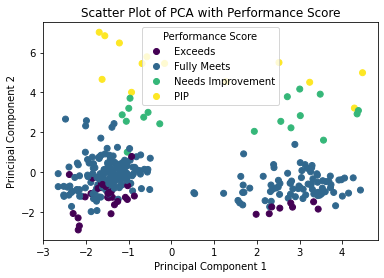

Variance Ratio: [0.18787893 0.09990429]


In [10]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
df_scaled = StandardScaler().fit_transform(df)  # Scale the preprocessed DataFrame
X_pca = pca.fit_transform(df_scaled)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

performance_score = df['PerformanceScore']

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=performance_score, cmap='viridis')

# Define the legend labels
legend_labels = ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Performance Score')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA with Performance Score')
plt.show()

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Variance Ratio:', explained_variance_ratio)


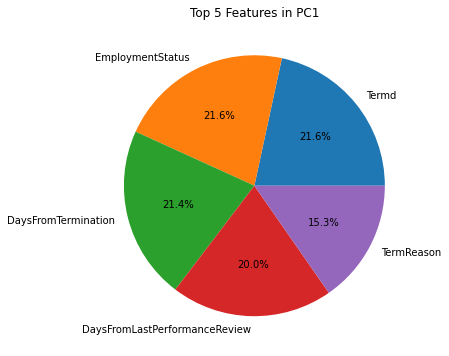

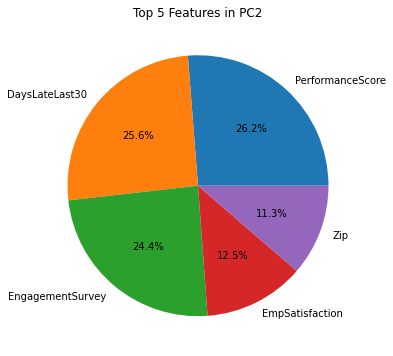

In [11]:
# Get the feature contributions for PC1 and PC2
feature_contributions = pd.DataFrame(pca.components_, columns=df.columns)

# Get the absolute values of feature contributions for PC1 and PC2
pc1_abs_contributions = np.abs(feature_contributions.iloc[0])
pc2_abs_contributions = np.abs(feature_contributions.iloc[1])

# Determine the top 5 most significant features for PC1 and PC2
top_pc1_features = pc1_abs_contributions.nlargest(5)
top_pc2_features = pc2_abs_contributions.nlargest(5)

# Create pie chart for PC1 features
plt.figure(figsize=(8, 6))
plt.pie(top_pc1_features, labels=top_pc1_features.index, autopct='%1.1f%%')
plt.title('Top 5 Features in PC1')
plt.show()

# Create pie chart for PC2 features
plt.figure(figsize=(8, 6))
plt.pie(top_pc2_features, labels=top_pc2_features.index, autopct='%1.1f%%')
plt.title('Top 5 Features in PC2')
plt.show()


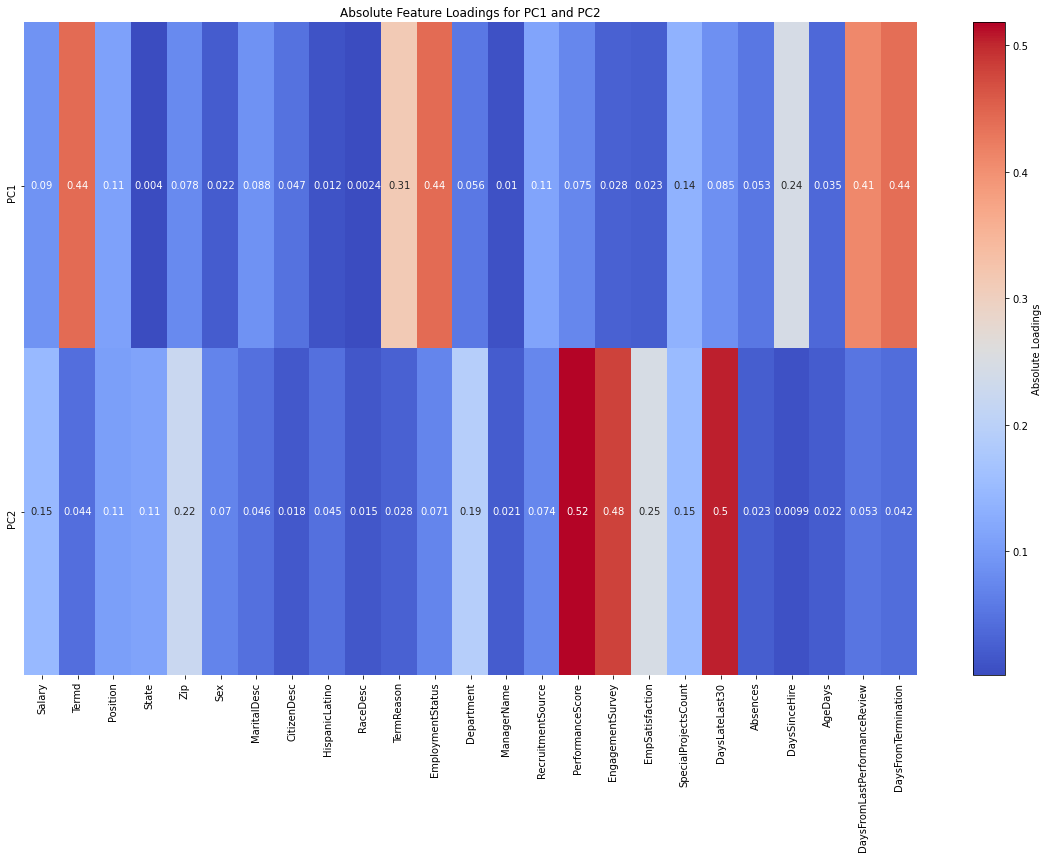

In [12]:
component_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])

plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(component_loadings.abs(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Absolute Feature Loadings for PC1 and PC2')

# Add a colorbar and legend
cbar = plt.colorbar(heatmap.collections[0])
cbar.ax.set_ylabel('Absolute Loadings')
plt.show()

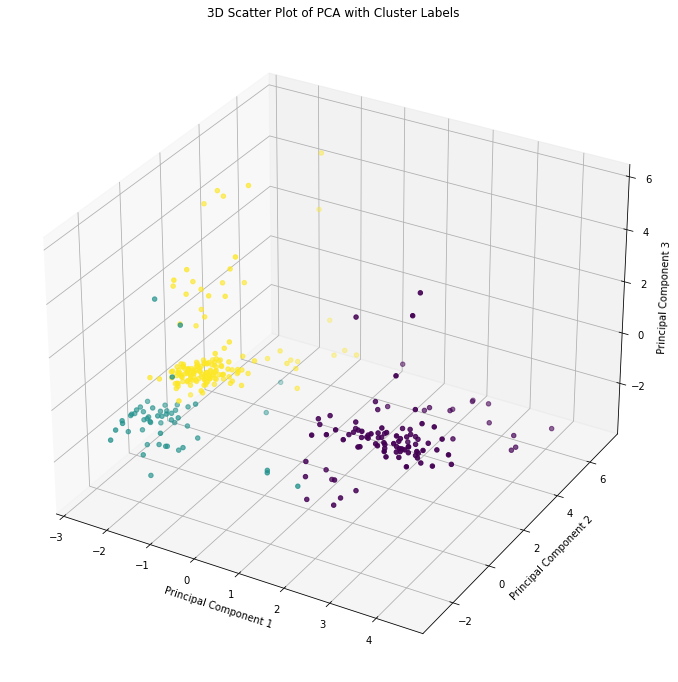

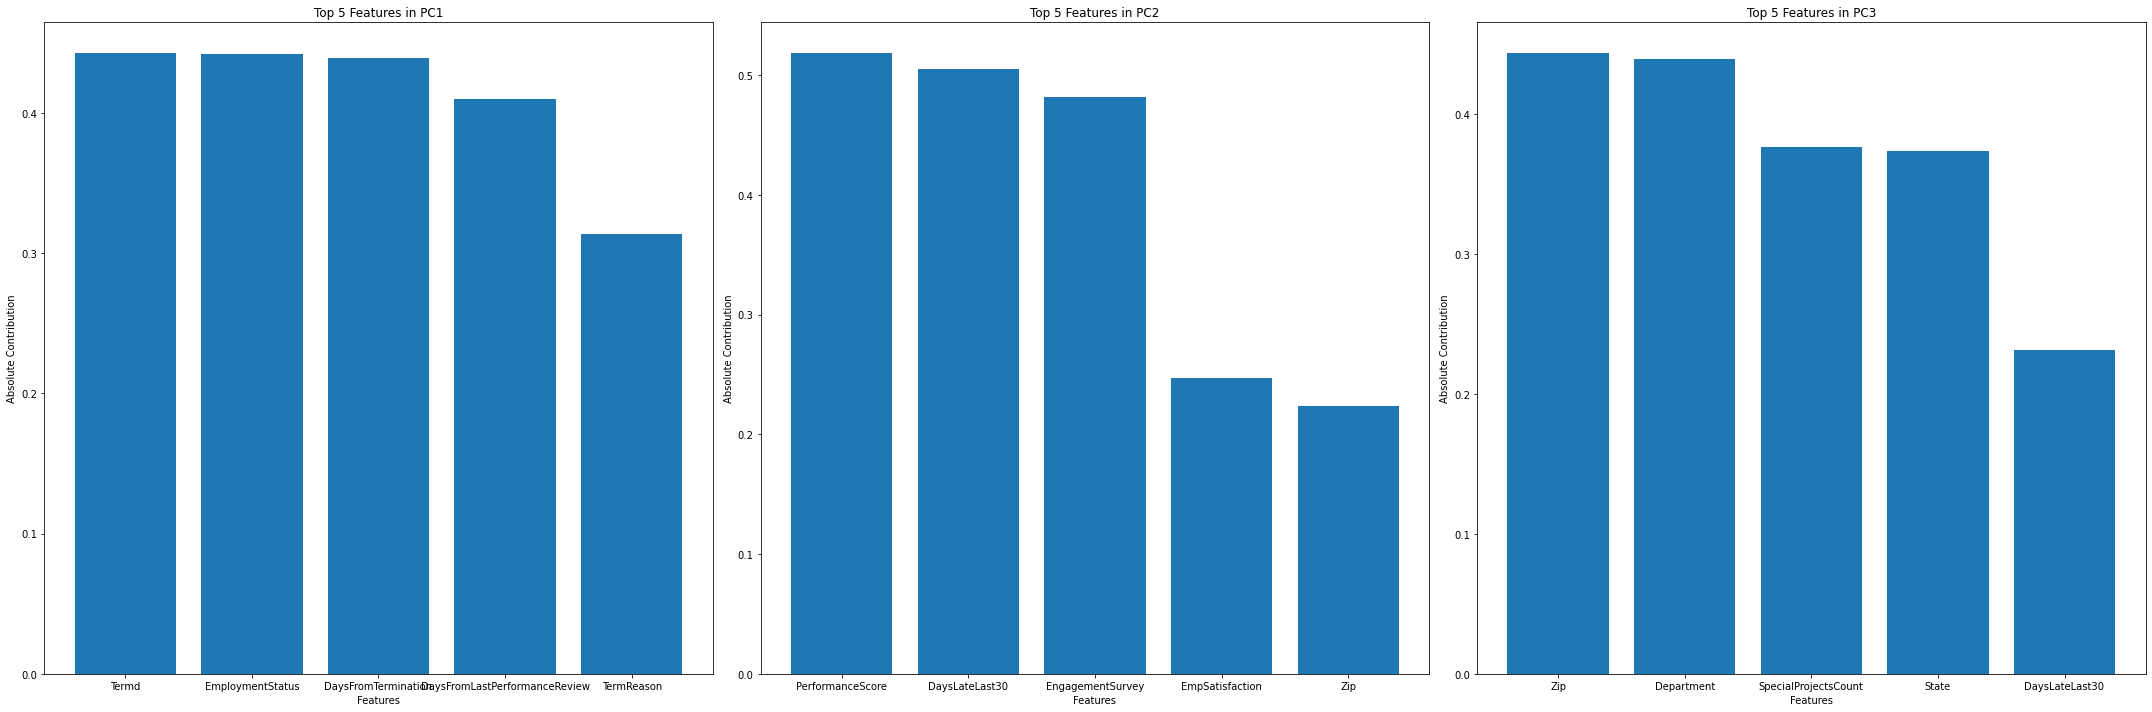

In [13]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
df_scaled = StandardScaler().fit_transform(df)  # Scale the preprocessed DataFrame
X_pca = pca.fit_transform(df_scaled)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Create a 3D scatter plot to visualize the results with different colors for each cluster
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D Scatter Plot of PCA with Cluster Labels')
plt.show()

# Get the feature contributions for PC1, PC2, and PC3
feature_contributions = pd.DataFrame(pca.components_, columns=df.columns)

# Get the absolute values of feature contributions for PC1, PC2, and PC3
pc1_abs_contributions = np.abs(feature_contributions.iloc[0])
pc2_abs_contributions = np.abs(feature_contributions.iloc[1])
pc3_abs_contributions = np.abs(feature_contributions.iloc[2])

# Determine the top 5 most significant features for PC1, PC2, and PC3
top_pc1_features = pc1_abs_contributions.nlargest(5)
top_pc2_features = pc2_abs_contributions.nlargest(5)
top_pc3_features = pc3_abs_contributions.nlargest(5)

# Create bar plots for top features in PC1, PC2, and PC3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

axes[0].bar(top_pc1_features.index, top_pc1_features.values)
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Absolute Contribution')
axes[0].set_title('Top 5 Features in PC1')

axes[1].bar(top_pc2_features.index, top_pc2_features.values)
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Absolute Contribution')
axes[1].set_title('Top 5 Features in PC2')

axes[2].bar(top_pc3_features.index, top_pc3_features.values)
axes[2].set_xlabel('Features')
axes[2].set_ylabel('Absolute Contribution')
axes[2].set_title('Top 5 Features in PC3')

plt.tight_layout()
plt.show()

# Create a biplot

Detected Outliers: [ 72 150]


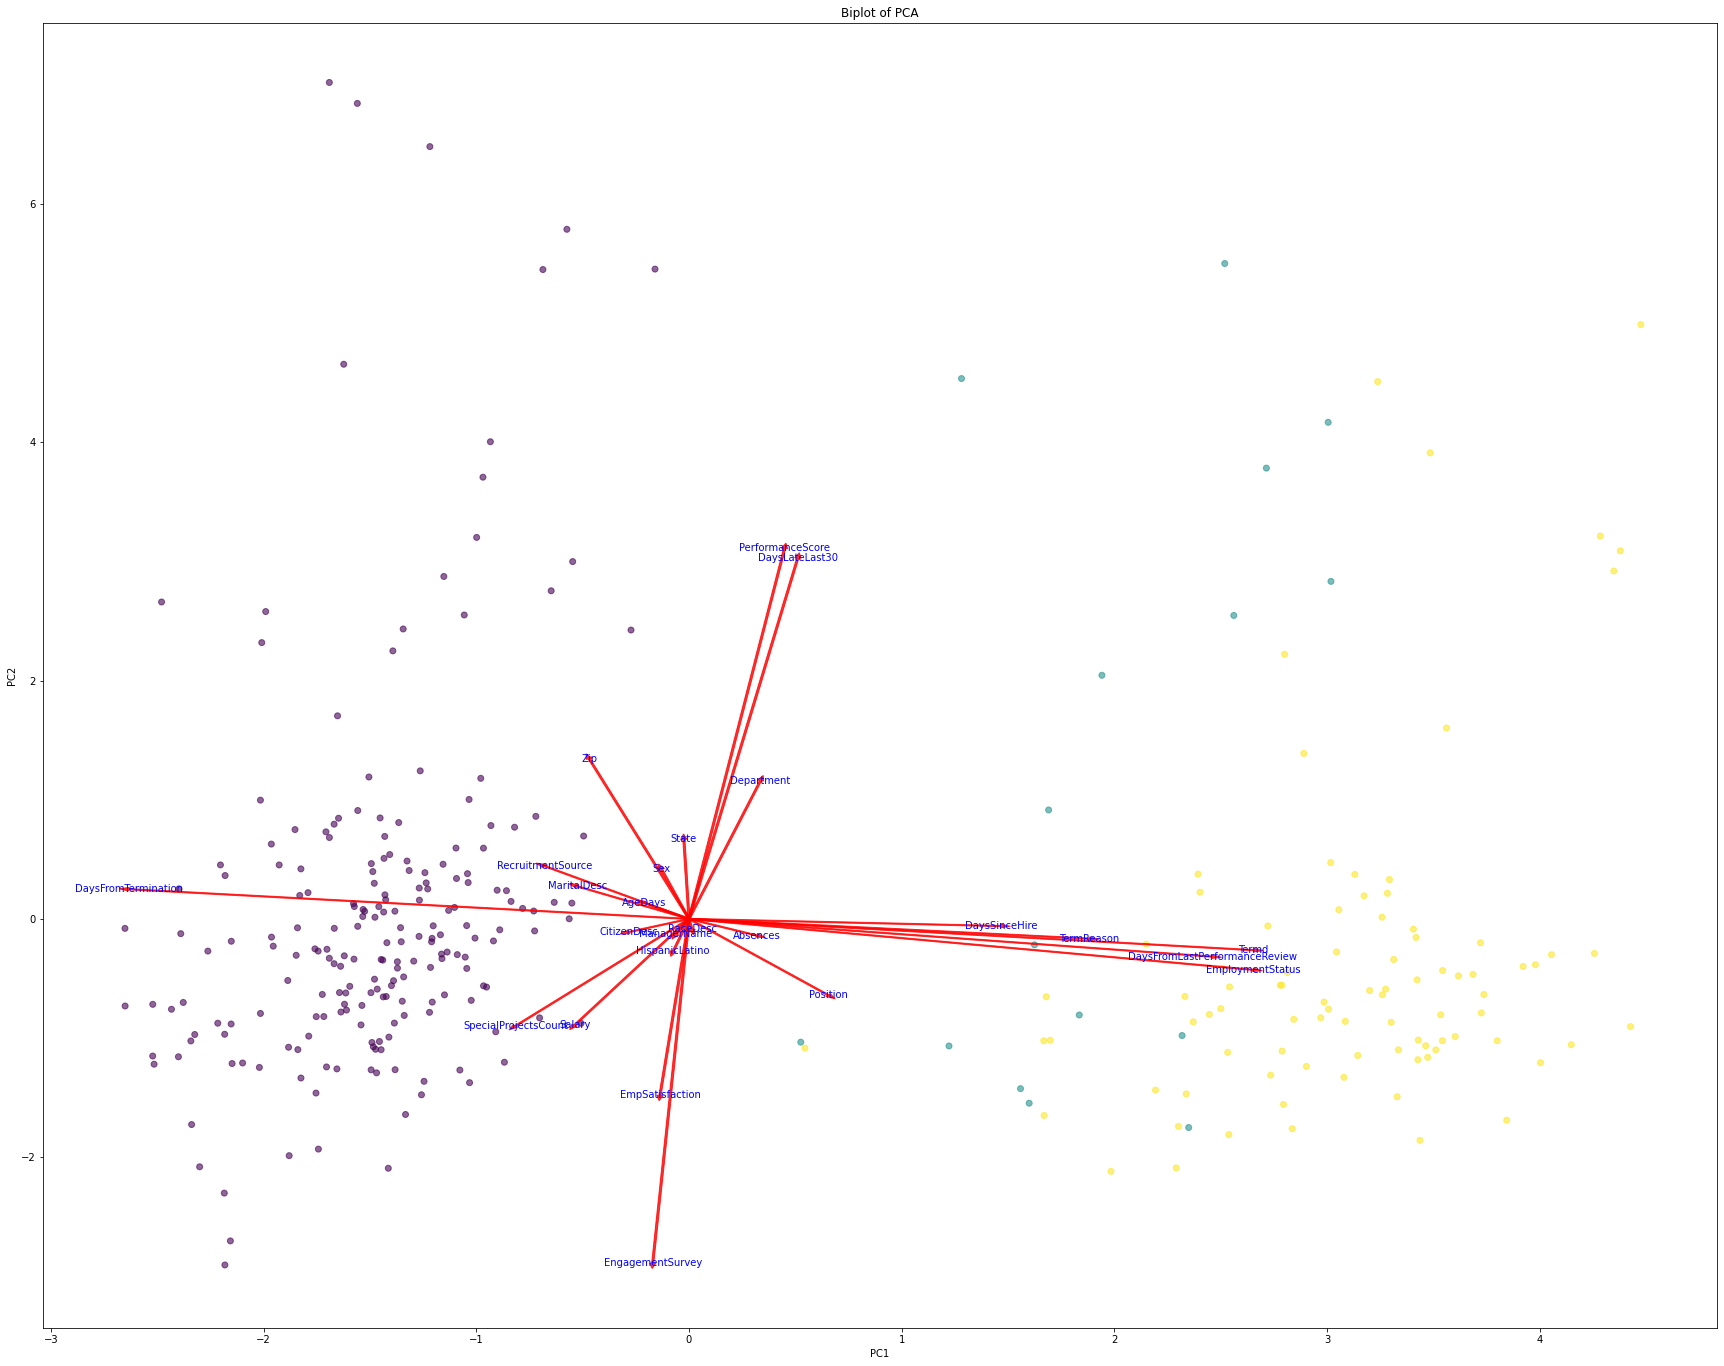

In [14]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
df_scaled = StandardScaler().fit_transform(df)  # Scale the preprocessed DataFrame
X_pca = pca.fit_transform(df_scaled)

# Create a biplot
plt.figure(figsize=(30, 24))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c=df['EmploymentStatus'], cmap='viridis')

# Add feature vectors to the biplot
features = pca.components_.T
scale_factor = 6
for i, feature in enumerate(features):
    plt.arrow(0, 0, scale_factor * feature[0], scale_factor * feature[1],
              color='r', alpha=0.8, width=0.01)
    plt.text(scale_factor * feature[0], scale_factor * feature[1], df.columns[i], color='b', ha='center', va='center')

# Set plot labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of PCA')

# Find outliers using Mahalanobis distance
cov_matrix = np.cov(df_scaled.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

distances = []
for i in range(len(df_scaled)):
    distance = np.sqrt(np.dot(np.dot(df_scaled[i], inv_cov_matrix), df_scaled[i].T))
    distances.append(distance)

# Set the threshold for outlier detection
threshold = np.mean(distances) + 3 * np.std(distances)

# Find the outliers
outliers = np.where(np.array(distances) > threshold)[0]

print("Detected Outliers:", outliers)

# Show the plot
plt.show()

# Using the PCA -  find outliers (Mahalanobis distance)

In [15]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_Human_Resuorces_Analytics.csv')

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
df_scaled = StandardScaler().fit_transform(df)
X_pca = pca.fit_transform(df_scaled)

# Calculate the Mahalanobis distance for each data point
cov_matrix = np.cov(X_pca.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

distances = []
for i in range(len(X_pca)):
    distance = np.sqrt(np.dot(np.dot(X_pca[i], inv_cov_matrix), X_pca[i].T))
    distances.append(distance)

# Set the threshold for outlier detection
threshold = np.mean(distances) + 3 * np.std(distances)

# Find the outliers
outliers = np.where(np.array(distances) > threshold)[0]

# Print the list of outliers
print("Detected Outliers:")
print(df.iloc[outliers])

Detected Outliers:
       Salary     Termd  Position     State       Zip       Sex  MaritalDesc  \
67  -0.296729 -0.708813 -2.241870 -3.387627  1.744576  1.141798     0.957859   
69  -0.630339 -0.708813  0.393630 -0.115726 -0.266242  1.141798    -0.784212   
72  -0.389776 -0.708813 -2.241870  5.446505  5.420027 -0.875811     0.957859   
90  -0.197629 -0.708813  0.393630 -0.115726 -0.262036  1.141798    -0.784212   
188 -0.526382  1.410810  0.525405 -0.115726 -0.241895  1.141798     0.957859   
205 -0.650843  1.410810  0.393630 -0.115726 -0.260851 -0.875811     0.957859   
263 -0.199062 -0.708813  0.393630 -0.115726 -0.264346 -0.875811    -0.784212   
267 -0.427919 -0.708813 -2.241870  1.847414  4.892043  1.141798    -0.784212   

     CitizenDesc  HispanicLatino  RaceDesc  ...  PerformanceScore  \
67      0.225718       -0.314547  0.146364  ...          3.373829   
69      0.225718       -0.314547  0.769915  ...          3.373829   
72      0.225718        3.179173  0.769915  ...      

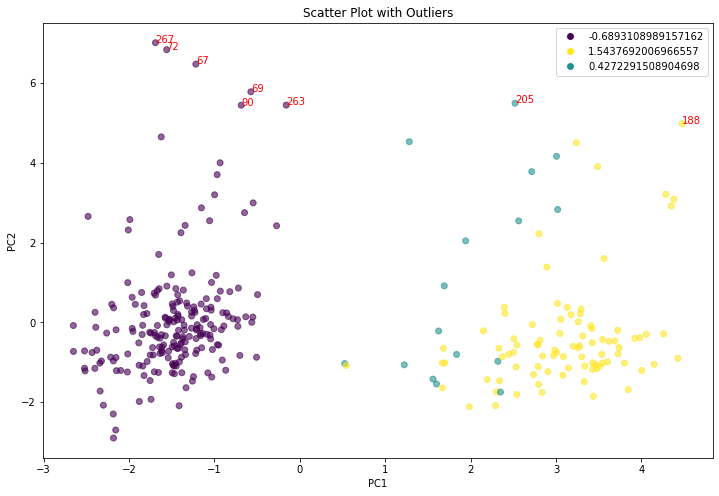

In [16]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c=df['EmploymentStatus'], cmap='viridis')

# Add annotations for outlier data points
for i in outliers:
    plt.annotate(str(i), (X_pca[i, 0], X_pca[i, 1]), color='red')

# Set plot labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot with Outliers')

legend_labels = df['EmploymentStatus'].unique()
legend_handles = []
for label in legend_labels:
    color = scatter.cmap(scatter.norm(label))
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8))

# Add the legend handles to the plot
plt.legend(handles=legend_handles)

# Show the plot
plt.show()


Based on the identified outliers using PCA and the Mahalanobis distance, we have the following data points as outliers:

Index 67: This employee has high values for various features, such as Salary, Termd, DaysLateLast30, and Absences. They also have a high number of DaysSinceHire and AgeDays, indicating a longer tenure and older age.
Index 69: This employee also has high values for Salary, Termd, DaysLateLast30, and Absences. They have a very low EmpSatisfaction score.
Index 72: This employee stands out with high values for Salary, Termd, DaysLateLast30, and Absences. They have a very low PerformanceScore and DaysFromTermination.
Index 90: Similar to previous outliers, this employee exhibits high values for Salary, Termd, DaysLateLast30, and Absences. They have a high EngagementSurvey score and a low EmpSatisfaction score.
Index 188: This employee has a high value for the SpecialProjectsCount feature and a low EmpSatisfaction score.
Index 205: This employee also has a high value for the SpecialProjectsCount feature and low EmpSatisfaction score.
Index 263: This employee has a high value for the SpecialProjectsCount feature and a high DaysFromTermination value.
Index 267: This employee stands out with high values for Salary, Termd, DaysLateLast30, and Absences. They have a low PerformanceScore and high DaysFromTermination.

# Section C :

In [85]:

# Read the dataset
df = pd.read_csv('preprocessed_Human_Resuorces_Analytics.csv')

# Separate features (X) and target variable (y)
X = df.drop('EmploymentStatus', axis=1)
y = df['EmploymentStatus']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Support Vector Machine (SVM)
svm_parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_grid = GridSearchCV(SVC(kernel='rbf', probability=True), svm_parameters)
svm_grid.fit(X_train_scaled, y_train_encoded)
svm_best_params = svm_grid.best_params_
svm_best_model = svm_grid.best_estimator_
svm_best_predictions = svm_best_model.predict(X_test_scaled)
svm_best_accuracy = accuracy_score(y_test_encoded, svm_best_predictions)
svm_best_confusion_matrix = confusion_matrix(y_test_encoded, svm_best_predictions)
svm_best_sensitivity = svm_best_confusion_matrix[1, 1] / (svm_best_confusion_matrix[1, 1] + svm_best_confusion_matrix[1, 0])
svm_best_specificity = svm_best_confusion_matrix[0, 0] / (svm_best_confusion_matrix[0, 0] + svm_best_confusion_matrix[0, 1])
print("SVM Best Parameters:", svm_best_params)
print("SVM Best Accuracy:", svm_best_accuracy)
print("SVM Best Sensitivity:", svm_best_sensitivity)
print("SVM Best Specificity:", svm_best_specificity)
print("SVM Best Confusion Matrix:")
print(svm_best_confusion_matrix)

# Random Forest
rf_parameters = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_parameters)
rf_grid.fit(X_train_scaled, y_train_encoded)
rf_best_params = rf_grid.best_params_
rf_best_model = rf_grid.best_estimator_
rf_best_predictions = rf_best_model.predict(X_test_scaled)
rf_best_accuracy = accuracy_score(y_test_encoded, rf_best_predictions)
rf_best_confusion_matrix = confusion_matrix(y_test_encoded, rf_best_predictions)
rf_best_sensitivity = rf_best_confusion_matrix[1, 1] / (rf_best_confusion_matrix[1, 1] + rf_best_confusion_matrix[1, 0])
rf_best_specificity = rf_best_confusion_matrix[0, 0] / (rf_best_confusion_matrix[0, 0] + rf_best_confusion_matrix[0, 1])
print("Random Forest Best Parameters:", rf_best_params)
print("Random Forest Best Accuracy:", rf_best_accuracy)
print("Random Forest Best Sensitivity:", rf_best_sensitivity)
print("Random Forest Best Specificity:", rf_best_specificity)
print("Random Forest Best Confusion Matrix:")
print(rf_best_confusion_matrix)

# Gradient Boosting
gb_parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_parameters)
gb_grid.fit(X_train_scaled, y_train_encoded)
gb_best_params = gb_grid.best_params_
gb_best_model = gb_grid.best_estimator_
gb_best_predictions = gb_best_model.predict(X_test_scaled)
gb_best_accuracy = accuracy_score(y_test_encoded, gb_best_predictions)
gb_best_confusion_matrix = confusion_matrix(y_test_encoded, gb_best_predictions)
gb_best_sensitivity = gb_best_confusion_matrix[1, 1] / (gb_best_confusion_matrix[1, 1] + gb_best_confusion_matrix[1, 0])
gb_best_specificity = gb_best_confusion_matrix[0, 0] / (gb_best_confusion_matrix[0, 0] + gb_best_confusion_matrix[0, 1])
print("Gradient Boosting Best Parameters:", gb_best_params)
print("Gradient Boosting Best Accuracy:", gb_best_accuracy)
print("Gradient Boosting Best Sensitivity:", gb_best_sensitivity)
print("Gradient Boosting Best Specificity:", gb_best_specificity)
print("Gradient Boosting Best Confusion Matrix:")
print(gb_best_confusion_matrix)

# Predict probabilities instead of labels
svm_best_probabilities = svm_best_model.predict_proba(X_test_scaled)
rf_best_probabilities = rf_best_model.predict_proba(X_test_scaled)
gb_best_probabilities = gb_best_model.predict_proba(X_test_scaled)

# Get probabilities for the positive class (class index 1)
svm_best_positive_probabilities = svm_best_probabilities[:, 1]
rf_best_positive_probabilities = rf_best_probabilities[:, 1]
gb_best_positive_probabilities = gb_best_probabilities[:, 1]

# Get the decision function scores
svm_best_decision_scores = svm_best_model.decision_function(X_test_scaled)

# SVM evaluation metrics
svm_best_predictions = svm_best_model.predict(X_test)
svm_best_decision_scores = svm_best_model.decision_function(X_test)

# Get class probabilities from decision scores
svm_best_probabilities = softmax(svm_best_decision_scores, axis=1)

svm_best_precision = precision_score(y_test_encoded, svm_best_predictions, average='weighted')
svm_best_recall = recall_score(y_test_encoded, svm_best_predictions, average='weighted')
svm_best_f1_score = f1_score(y_test_encoded, svm_best_predictions, average='weighted')
svm_best_roc_auc = roc_auc_score(y_test_encoded, svm_best_probabilities, average='weighted', multi_class='ovr')


# Random Forest evaluation metrics
rf_best_predictions = rf_best_model.predict(X_test)
rf_best_probabilities = rf_best_model.predict_proba(X_test)

# Get probabilities for each class
rf_best_class_probabilities = rf_best_probabilities

rf_best_precision = precision_score(y_test_encoded, rf_best_predictions, average='weighted')
rf_best_recall = recall_score(y_test_encoded, rf_best_predictions, average='weighted')
rf_best_f1_score = f1_score(y_test_encoded, rf_best_predictions, average='weighted')
rf_best_roc_auc = roc_auc_score(y_test_encoded, rf_best_class_probabilities, average='weighted', multi_class='ovr')


# Gradient Boosting evaluation metrics
gb_best_predictions = gb_best_model.predict(X_test)
gb_best_probabilities = gb_best_model.predict_proba(X_test)

# Get probabilities for each class
gb_best_class_probabilities = gb_best_probabilities

gb_best_precision = precision_score(y_test_encoded, gb_best_predictions, average='weighted')
gb_best_recall = recall_score(y_test_encoded, gb_best_predictions, average='weighted')
gb_best_f1_score = f1_score(y_test_encoded, gb_best_predictions, average='weighted')
gb_best_roc_auc = roc_auc_score(y_test_encoded, gb_best_class_probabilities, average='weighted', multi_class='ovr')

print("SVM Best Precision:", svm_best_precision)
print("SVM Best Recall:", svm_best_recall)
print("SVM Best F1 Score:", svm_best_f1_score)
print("SVM Best ROC AUC Score:", svm_best_roc_auc)

print("Random Forest Best Precision:", rf_best_precision)
print("Random Forest Best Recall:", rf_best_recall)
print("Random Forest Best F1 Score:", rf_best_f1_score)
print("Random Forest Best ROC AUC Score:", rf_best_roc_auc)

print("Gradient Boosting Best Precision:", gb_best_precision)
print("Gradient Boosting Best Recall:", gb_best_recall)
print("Gradient Boosting Best F1 Score:", gb_best_f1_score)
print("Gradient Boosting Best ROC AUC Score:", gb_best_roc_auc)


SVM Best Parameters: {'C': 10, 'gamma': 0.1}
SVM Best Accuracy: 0.873015873015873
SVM Best Sensitivity: 0.0
SVM Best Specificity: 1.0
SVM Best Confusion Matrix:
[[41  0  0]
 [ 2  0  2]
 [ 3  1 14]]
Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 50}
Random Forest Best Accuracy: 0.9523809523809523
Random Forest Best Sensitivity: 1.0
Random Forest Best Specificity: 1.0
Random Forest Best Confusion Matrix:
[[41  0  0]
 [ 0  1  3]
 [ 0  0 18]]
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Gradient Boosting Best Accuracy: 0.9523809523809523
Gradient Boosting Best Sensitivity: 1.0
Gradient Boosting Best Specificity: 1.0
Gradient Boosting Best Confusion Matrix:
[[41  0  0]
 [ 0  2  2]
 [ 0  1 17]]
SVM Best Precision: 0.845046166614794
SVM Best Recall: 0.8888888888888888
SVM Best F1 Score: 0.865422137847387
SVM Best ROC AUC Score: 0.9822516257544506
Random Forest Best Precision: 0.9714285714285714
Random Forest Best Recall: 0.9682539682539683

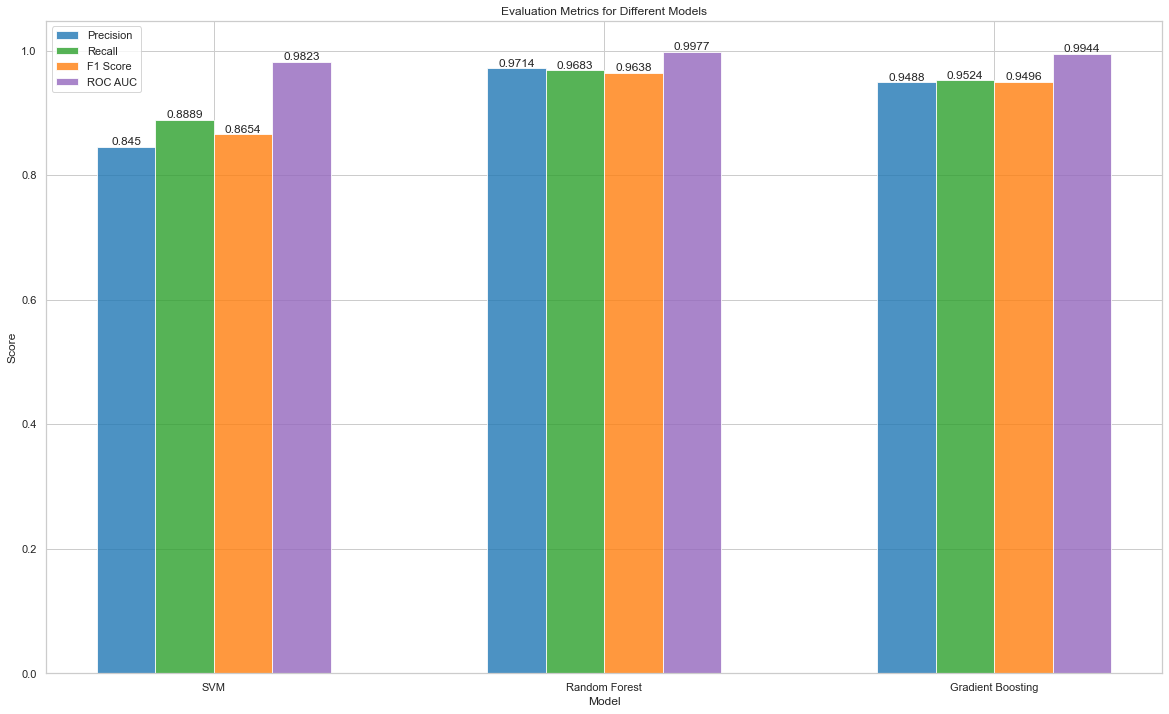

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define custom color palettes for each metric
precision_color = ['#1f77b4']  # Blue
recall_color = ['#2ca02c']  # Green
f1_score_color = ['#ff7f0e']  # Orange
roc_auc_color = ['#9467bd']  # Purple

# Create a DataFrame with the evaluation metrics
metrics_data = {
    'Model': ['SVM', 'Random Forest', 'Gradient Boosting'],
    'Precision': [svm_best_precision, rf_best_precision, gb_best_precision],
    'Recall': [svm_best_recall, rf_best_recall, gb_best_recall],
    'F1 Score': [svm_best_f1_score, rf_best_f1_score, gb_best_f1_score],
    'ROC AUC': [svm_best_roc_auc, rf_best_roc_auc, gb_best_roc_auc]
}
metrics_df = pd.DataFrame(metrics_data)

# Set the width of the bars
bar_width = 0.15

# Set the x positions of the bars
x = np.arange(len(metrics_df['Model']))

# Plot the evaluation metrics
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")

bars_precision = plt.bar(x - 1.5 * bar_width, metrics_df['Precision'], width=bar_width, color=precision_color[0], alpha=0.8, label='Precision')
bars_recall = plt.bar(x - 0.5 * bar_width, metrics_df['Recall'], width=bar_width, color=recall_color[0], alpha=0.8, label='Recall')
bars_f1_score = plt.bar(x + 0.5 * bar_width, metrics_df['F1 Score'], width=bar_width, color=f1_score_color[0], alpha=0.8, label='F1 Score')
bars_roc_auc = plt.bar(x + 1.5 * bar_width, metrics_df['ROC AUC'], width=bar_width, color=roc_auc_color[0], alpha=0.8, label='ROC AUC')

plt.title('Evaluation Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(x, metrics_df['Model'])
plt.legend()

# Add labels on top of the bars
for bar in bars_precision + bars_recall + bars_f1_score + bars_roc_auc:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 4), ha='center', va='bottom')

plt.show()


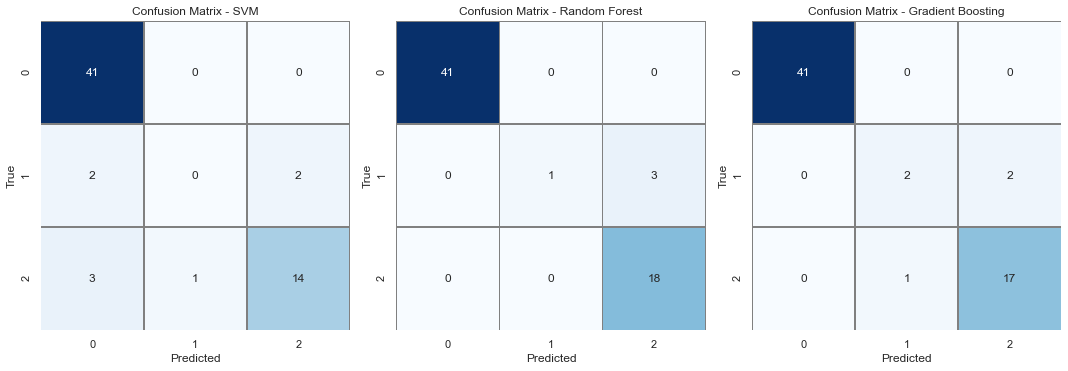

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix data
confusion_matrices = [svm_best_confusion_matrix, rf_best_confusion_matrix, gb_best_confusion_matrix]
model_names = ['SVM', 'Random Forest', 'Gradient Boosting']

# Plot the confusion matrix for each model
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")

for i, matrix in enumerate(confusion_matrices):
    ax = plt.subplot(1, 3, i+1)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
    ax.set_title(f'Confusion Matrix - {model_names[i]}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_aspect('equal')  # To make the cells square

    # Add spacing between subplots
    if i > 0:
        plt.subplots_adjust(wspace=0.5)

plt.tight_layout()
plt.show()
